# Exploring Advertisements in our Dataset

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load and Process Data

In [237]:
os.listdir('merged datasets')

['.DS_Store',
 'merged_50405.csv',
 'merged_12345.csv',
 'merged_10824.csv',
 'Merging Datasets.ipynb',
 '.ipynb_checkpoints',
 'merged_33534.csv',
 'merged_26301.csv']

### Load Data

In [244]:
# Load data from merged datasets folder
df10824 = pd.read_csv('merged datasets/merged_10824.csv',index_col=0)
df12345 = pd.read_csv('merged datasets/merged_12345.csv',index_col=0)
df26301 = pd.read_csv('merged datasets/merged_26301.csv',index_col=0)
df33534 = pd.read_csv('merged datasets/merged_33534.csv',index_col=0)
df50405 = pd.read_csv('merged datasets/merged_50405.csv',index_col=0)

# Remove extra "Unnamed: 0" column from df10824
df10824.drop(['Unnamed: 0'],axis=1,inplace=True)

### Process Data

In [245]:
# Create codes and dfs lists for easier processing
codes = ['10824','12345','26301','33534','50405']
dfs = [df10824, df12345, df26301, df33534,df50405]

In [247]:
# Check original shape of dfs
print("Shapes of Original Dataframes")
for df, code in zip(dfs,codes):
    print(code,df.shape)
    
# Check for duplicate rows (duplicate 'Date' and 'Link')
print("\nNumber of Duplicate Rows")
for df, code in zip(dfs,codes):
    duplicates = df[df.duplicated(subset=['Date','Link'])]
    print(code, len(duplicates))
    
# Remove duplicate rows (duplicate 'Date' and 'Link')
print("\nUpdated Shapes and Number of Duplicates")
for df, code in zip(dfs,codes):
    df.drop_duplicates(subset=['Date','Link'],inplace=True,keep='first',ignore_index=True)
    duplicates = df[df.duplicated()]
    print(code, df.shape, len(duplicates), "duplicates")

Shapes of Original Dataframes
10824 (11153, 22)
12345 (25663, 22)
26301 (10730, 22)
33534 (9170, 22)
50405 (27723, 22)

Number of Duplicate Rows
10824 608
12345 6587
26301 2024
33534 1146
50405 3432

Updated Shapes and Number of Duplicates
10824 (10545, 22) 0 duplicates
12345 (19076, 22) 0 duplicates
26301 (8706, 22) 0 duplicates
33534 (8024, 22) 0 duplicates
50405 (24291, 22) 0 duplicates


In [248]:
for df, code in zip(dfs,codes):
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Create additional columns for month and year
    df['Year'] = df['Date'].dt.year #df['Date'].apply(lambda date:date.year)
    df['Month'] = df['Date'].dt.month #df['Date'].apply(lambda date:date.month)
    
    # Create additional column for user's code
    df['code'] = code

In [249]:
# Create df with all data
all_dfs = pd.concat(dfs)

## Explore All Data

In [250]:
# Check all columns
all_dfs.columns

Index(['Date', 'Link', 'video_id', 'video_timestamp', 'video_duration',
       'video_locationcreated', 'suggested_words', 'video_diggcount',
       'video_sharecount', 'video_commentcount', 'video_playcount',
       'video_description', 'video_is_ad', 'video_stickers', 'author_username',
       'author_name', 'author_followercount', 'author_followingcount',
       'author_heartcount', 'author_videocount', 'author_diggcount',
       'author_verified', 'Year', 'Month', 'code'],
      dtype='object')

In [251]:
# Check datatypes
all_dfs.dtypes

Date                     datetime64[ns]
Link                             object
video_id                          int64
video_timestamp                  object
video_duration                  float64
video_locationcreated            object
suggested_words                  object
video_diggcount                 float64
video_sharecount                float64
video_commentcount              float64
video_playcount                 float64
video_description                object
video_is_ad                        bool
video_stickers                  float64
author_username                  object
author_name                      object
author_followercount            float64
author_followingcount           float64
author_heartcount               float64
author_videocount               float64
author_diggcount                float64
author_verified                    bool
Year                              int32
Month                             int32
code                             object


In [252]:
# Check 'Date' range (where 'Date' is the video watch date from JSON files)
all_dfs.groupby('code')[['Year','Month']].value_counts().sort_index()

code   Year  Month
10824  2023  11         40
             12       1520
       2024  2        8985
12345  2023  9        2589
             11       1824
             12       5142
       2024  1        4896
             2        3859
             3         766
26301  2023  9           1
             10         10
             11          9
             12         30
       2024  1          75
             2        3700
             3        4881
33534  2023  9          25
             10         23
             11         36
             12         60
       2024  1        4389
             2        3491
50405  2023  8        9074
             9         948
             10       1442
             11        955
             12       5735
       2024  1        6010
             2         127
Name: count, dtype: int64

/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3

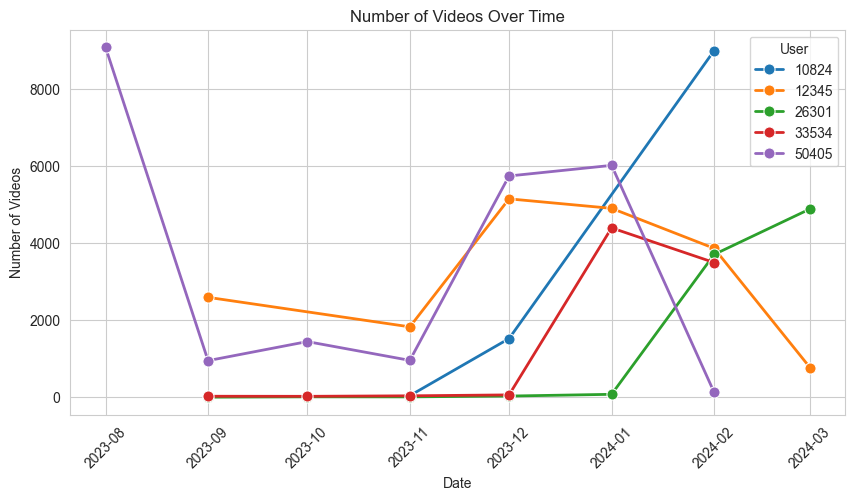

In [253]:
# Visualize the number of ads over time for each user
vid_counts = all_dfs.groupby('code')[['Year','Month']].value_counts().sort_index().reset_index()

# Create a new 'Date'column, assigning each year-month a specific day value of 1
vid_counts['Date'] = pd.to_datetime(vid_counts[['Year','Month']].assign(day=1))

# Rename some columns
vid_counts.columns = ['User','Year','Month','Video Count','Date']

# Create a line graph
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.lineplot(data=vid_counts, x='Date',y='Video Count',
             hue='User',marker='o',linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.title('Number of Videos Over Time')
plt.xticks(rotation=45)
plt.show()

**We see that across all our users, our videos span from as early as 08/2023 for user 50405 up to 03/2024 for user 26301.**

## Explore Advertisements Specifically

In [254]:
# Get a df of only the advertisements
all_ads = all_dfs[all_dfs['video_is_ad']==True]

In [255]:
all_ads.shape

(8797, 25)

### Number of Advertisements Over Time

In [256]:
# Check 'Date' range of advertisements
all_ads.groupby('code')[['Year','Month']].value_counts().sort_index()

code   Year  Month
10824  2023  11         13
             12        237
       2024  2          35
12345  2023  9          22
             11        200
             12        647
       2024  1         437
             2         358
             3         111
26301  2023  9           1
             10          9
             11          6
             12         19
       2024  1          32
             2         905
             3         635
33534  2023  9          24
             10         23
             11         31
             12         56
       2024  1         814
             2         635
50405  2023  8        1404
             9         180
             10        191
             11         74
             12        924
       2024  1         773
             2           1
Name: count, dtype: int64

/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3

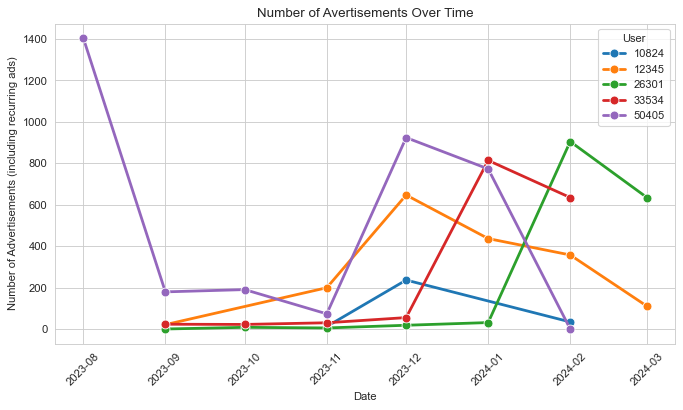

In [302]:
# Visualize the NUMBER of ads over time for each user
ad_counts = all_ads.groupby('code')[['Year','Month']].value_counts().sort_index().reset_index()

# Create a new 'Date'column, assigning each year-month a specific day value of 1
ad_counts['Date'] = pd.to_datetime(ad_counts[['Year','Month']].assign(day=1))

# Rename some columns
ad_counts.columns = ['User','Year','Month','Ad Count','Date']

# Create a line graph
plt.figure(figsize=(10, 5))
plt.style.use('default')
sns.set_style("whitegrid")
sns.lineplot(data=ad_counts, x='Date',y='Ad Count',
             hue='User',marker='o',linewidth=2.5, markersize=8)
plt.xlabel('Date')
plt.ylabel('Number of Advertisements (including recurring ads)')
plt.title('Number of Avertisements Over Time')
plt.xticks(rotation=45)
plt.show()

### Proportion of Advertisements Over Time

/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3

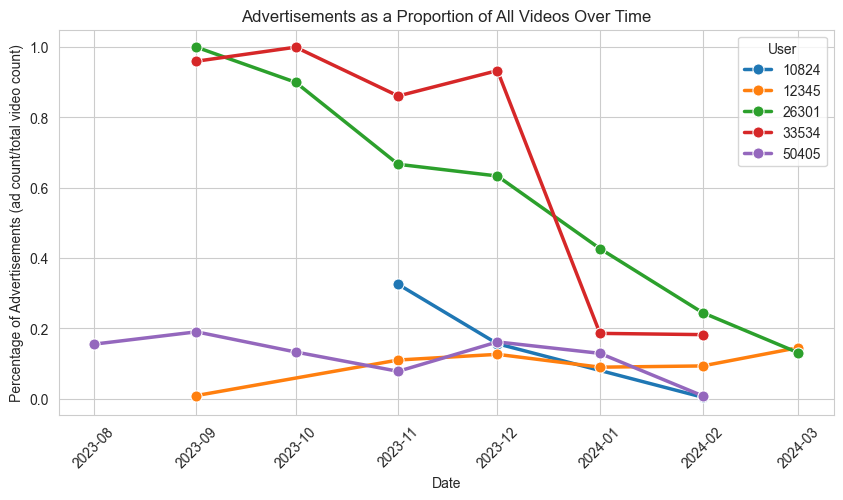

In [303]:
# Visualize the PERCENTAGE of ads per month for each user

# Combine regular video counts by date and ad video counts by date
merged_counts = pd.merge(vid_counts, ad_counts, on=['User','Year','Month','Date'])
merged_counts['Ad Proportion'] = merged_counts['Ad Count']/merged_counts['Video Count']

# Create a line graph
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.lineplot(data=merged_counts, x='Date',y='Ad Proportion',
             hue='User',marker='o',linewidth=2.5, markersize=8)
plt.xlabel('Date')
plt.ylabel('Percentage of Advertisements (ad count/total video count)')
plt.title('Advertisements as a Proportion of All Videos Over Time')
plt.xticks(rotation=45)
plt.show()

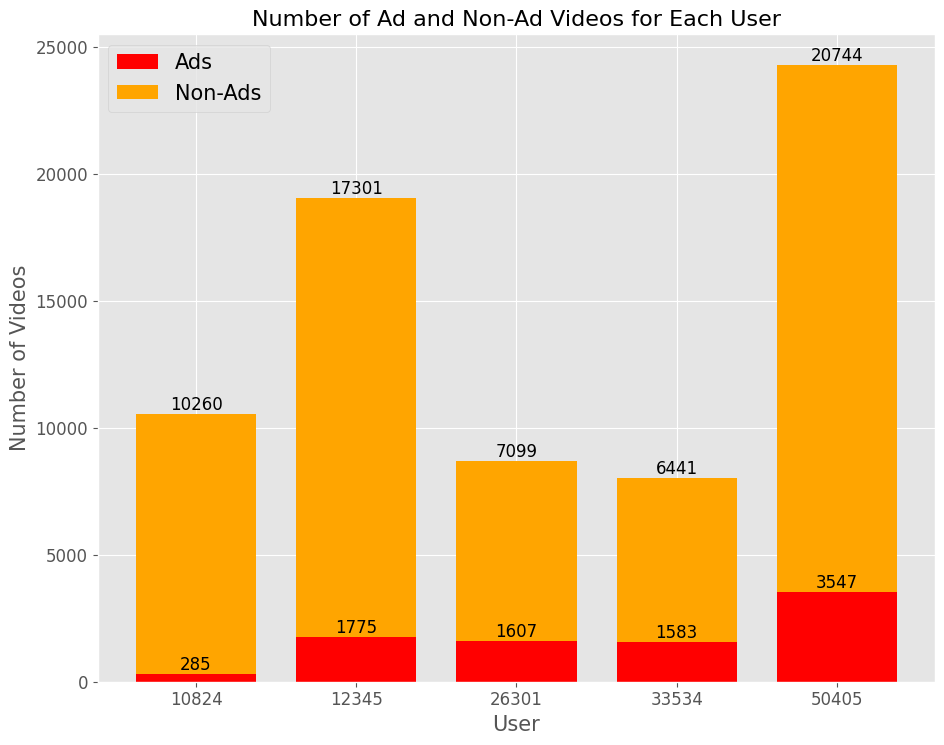

In [357]:
# Get the counts of ads and non-ads for each user
video_counts = all_dfs.groupby(['code', 'video_is_ad']).size().unstack(fill_value=0)

# Create barplot
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

# Create the bars
bar_width = 0.75
index = range(len(video_counts.index))
ad_bars = plt.bar(index, video_counts[True], bar_width, label='Ads', color='red')
non_ad_bars = plt.bar(index, video_counts[False], bar_width, label='Non-Ads', bottom=video_counts[True],color='orange')

# Add labels, title, and legend
plt.xlabel('User', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('Number of Ad and Non-Ad Videos for Each User', fontsize=16)
plt.xticks(index, video_counts.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15)

# Add counts to the bars
for bar, ad_count, non_ad_count in zip(ad_bars, video_counts[True], video_counts[False]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{ad_count}', ha='center', va='bottom', fontsize=12)
    plt.text(bar.get_x() + bar.get_width()/2., height + non_ad_count, f'{non_ad_count}', ha='center', va='bottom', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

### Unique Advertisers

In [304]:
# Number of verified advertisers (not unique)
print("Number of verified advertisers:",
      len(all_ads[all_ads['author_verified']==True].author_name.unique()))

# Number of non-verified advertisers
print("Number of non-verified advertisers:",
      len(all_ads[all_ads['author_verified']==False].author_name.unique()))

Number of verified advertisers: 682
Number of non-verified advertisers: 2228


In [305]:
# Total number of advertisements
print("Total number of advertisements (including videos that reappear):",len(all_ads))

# Percentage of all videos
print("Proportion of all videos that are ads (including videos that reappear):",
      round(len(all_ads)/len(all_dfs),3))

# Number of unique advertisers
print("Number of unique advertisers:",len(all_ads['author_username'].unique()))

# Number of unique ad videos
print("Number of unique ad videos (video id):",len(all_ads['video_id'].unique()))

Total number of advertisements (including videos that reappear): 8797
Proportion of all videos that are ads (including videos that reappear): 0.125
Number of unique advertisers: 2866
Number of unique ad videos (video id): 5635


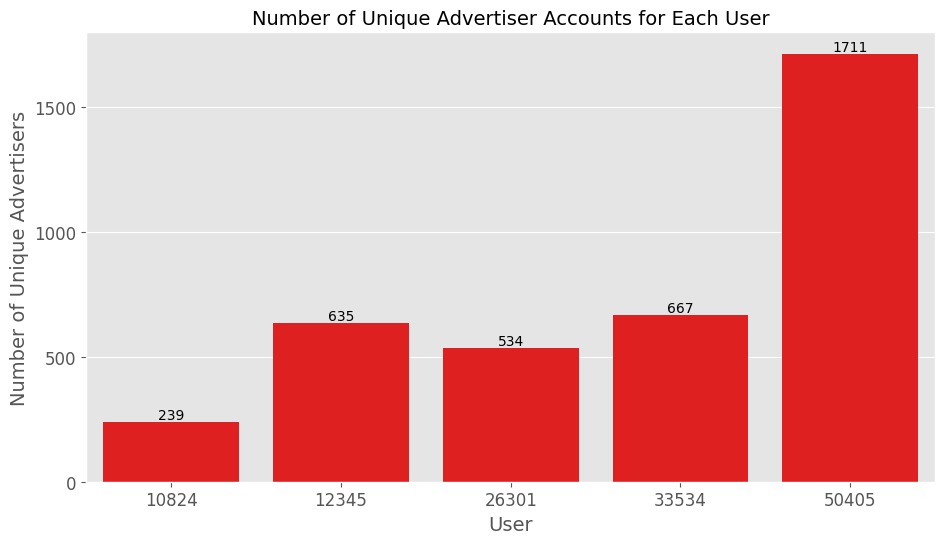

In [382]:
# Visualize the number of unique advertisers for each user
advertiser_counts = all_ads.groupby('code')['author_username'].nunique()

plt.figure(figsize=(10, 6))
plot = sns.barplot(x=advertiser_counts.index, y=advertiser_counts.values, color='red')
plt.xlabel('User',fontsize=14)
plt.ylabel('Number of Unique Advertisers',fontsize=14)
plt.title('Number of Unique Advertiser Accounts for Each User', fontsize=14)
plt.xticks(fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()

# Add count on top of each bar
for index, value in (enumerate(advertiser_counts.values)):
    plot.text(index,value + 0.2, str(value),ha='center',va='bottom',fontsize=10)

# Show plot
plt.show()

### Unique Ad Videos by Advertiser

In [329]:
# Find the counts of each unique video id (each unique advertisement video)
ads_by_advertiser = all_ads.groupby(['author_username','video_id']).size().reset_index()
ads_by_advertiser.columns = ['author_username','video_id','count']
ads_by_advertiser[ads_by_advertiser['count']>10]
ads_by_advertiser.sort_values(by='count',ascending=False)

,author_username,video_id,count
143,Amazon Shopping,7267607669609860354,56
130,Amazon Home,7304053237747813634,43
555,DoorDash - Food Delivery,7293621011013061890,39
558,DoorDash - Food Delivery,7293621012162252033,34
147,Amazon Shopping,7306312509118500097,30
...,...,...,...
5585,wixstudio,7333618556732509448,1
5586,wizz_app,7322780204584226080,1
5571,whowhatwear,7327245868027940098,1
5572,willowboutique____,7267557230226984235,1


In [330]:
# Find the number of unique videos posted per advertiser
unique_ads_by_advertiser = ads_by_advertiser['author_username'].value_counts()
unique_ads_by_advertiser.head()

author_username
TikTok Research        29
primevideo             28
Maybelline New York    25
Target                 24
MONOPOLY GO!           23
Name: count, dtype: int64

/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


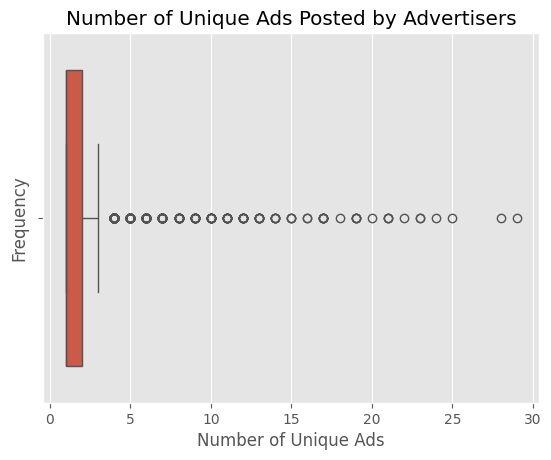

In [331]:
# Visualize the number of unique ad videos posted per advertiser

# Dataframe of counts of unique videos posted per advertiser
unique_ads_by_advertiser = ads_by_advertiser['author_username'].value_counts().reset_index()

# Plot distribution of number of unique ads by advertiser
plt.style.use('ggplot')
sns.boxplot(data=unique_ads_by_advertiser,x='count')
plt.xlabel('Number of Unique Ads')
plt.ylabel('Frequency')
plt.title('Number of Unique Ads Posted by Advertisers')
plt.show()


/var/folders/yl/zl57ck115t9_8v83kxw1gtc40000gn/T/ipykernel_35989/3718691586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_unique_ads_advertisers['short_author'] = short_author


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'TikTok Research'),
  Text(1, 0, 'primevideo'),
  Text(2, 0, 'Maybelline New York'),
  Text(3, 0, 'Target'),
  Text(4, 0, 'MONOPOLY GO!'),
  Text(5, 0, 'Chewy'),
  Text(6, 0, 'CapitalOne'),
  Text(7, 0, 'Peacock'),
  Text(8, 0, 'marshalls'),
  Text(9, 0, "REESE'S"),
  Text(10, 0, 'Starbucks'),
  Text(11, 0, 'Walmart'),
  Text(12, 0, 'sephora'),
  Text(13, 0, 'nyxcosmetics'),
  Text(14, 0, 'tjmaxx'),
  Text(15, 0, 'Allstate'),
  Text(16, 0, 'DisneyPlus'),
  Text(17, 0, 'Panera Bread'),
  Text(18, 0, 'Wingstop'),
  Text(19, 0, 'Hinge - Dating & Rel'),
  Text(20, 0, 'firstaidbeauty'),
  Text(21, 0, 'Subway®'),
  Text(22, 0, 'Dove'),
  Text(23, 0, "McDonald's"),
  Text(24, 0, 'aerie')])

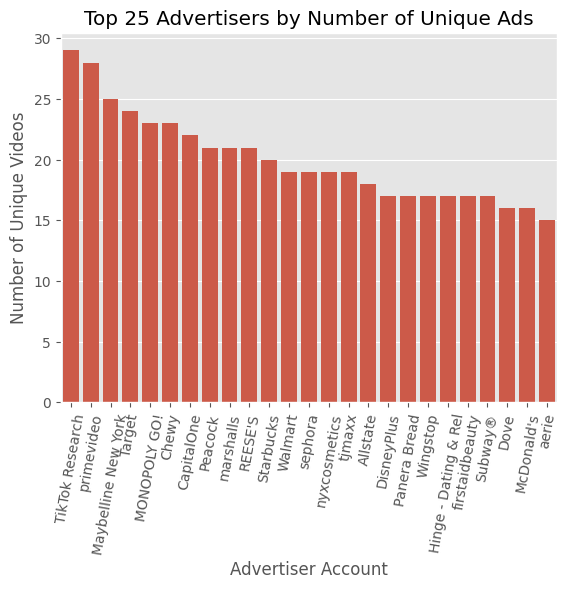

In [344]:
# Advertisers who post many unique ads (produce the )
top_unique_ads_advertisers = unique_ads_by_advertiser.iloc[:25]

# Get shortened x-ticks
short_author = top_unique_ads_advertisers['author_username'].apply(lambda x: x[:20])
top_unique_ads_advertisers['short_author'] = short_author

# Plot the Advertisers who post the highest number of unique videos
sns.barplot(data=top_unique_ads_advertisers,x='short_author',y='count')
plt.xlabel('Advertiser Account')
plt.ylabel('Number of Unique Videos')
plt.title('Top 25 Advertisers by Number of Unique Ads')
plt.xticks(rotation=80)

## Check for Repetition in the Number of Times an Ad Appears

In [ ]:
# How many times does a user see the same ad?

## Case Study

In [367]:
all_ads['code'].value_counts()

code
50405    3547
12345    1775
26301    1607
33534    1583
10824     285
Name: count, dtype: int64

In [394]:
# Look at all advertisers
# for advertiser in all_dfs['author_username'].unique(): print(advertiser)

In [393]:
# For each user, count the number of ads they receivd from each advertiser
brand_counts_by_user = all_ads.groupby('code')['author_username'].value_counts().sort_values(ascending=False).reset_index()
brand_counts_by_user.iloc[:10]

,code,author_username,count
0,12345,DoorDash - Food Delivery,145
1,33534,Amazon Shopping,116
2,12345,Hinge - Dating & Relationships,65
3,26301,Chewy,51
4,26301,Amazon,48
5,12345,Tinder Dating app. Meet People,38
6,26301,NIRVANA JEWELRY,35
7,26301,Amazon Shopping,35
8,26301,Dove,28
9,50405,firstaidbeauty,26


### Looking at 1 Valentine's-Day-Related Advertiser: "Hinge - Dating & Relationships"

In [492]:
# Get all advertisements from Hinge
hinge = all_dfs[all_dfs['author_username'] == 'Hinge - Dating & Relationships']
print(hinge.shape)

(65, 25)


In [493]:
# Check how many users got ads from Hinge
len(hinge['code'].unique())

1

In [494]:
# See the number of unique advertisements posted by Hinge
print("Number of unique ads by Hinge:",len(hinge['video_id'].unique()))

Number of unique ads by Hinge: 17


In [495]:
# Number of times different ads from Hinge appear
hinge['video_id'].value_counts()

video_id
7323344420152052993    14
7323344420705766658    12
7328494396243053825     8
7328494400865111297     7
7330439956667600129     5
7323344418466024705     4
7338600190506749186     3
7335585750244723970     2
7338600197171203330     2
7338600661233175809     1
7338600992297979137     1
7333290693961518337     1
7338599887472233729     1
7330439953249357057     1
7335583254239530241     1
7330439957292535042     1
7258042789273931010     1
Name: count, dtype: int64

In [480]:
# Get number of videos per Date
# hinge_counts = hinge['Date'].value_counts()
# hinge_counts

# type(hinge_counts)
# type(hinge_counts.index)
# type(hinge_counts.values)

# Convert to a Dataframe with 'Date' as the index
# hinge_df = pd.DataFrame(hinge_counts)
# print(hinge_df.shape)
# hinge_df

In [497]:
hinge['Year-Month-Day'] = hinge['Date'].dt.strftime('%Y-%m-%d')
hinge['Year-Month-Day']

/var/folders/yl/zl57ck115t9_8v83kxw1gtc40000gn/T/ipykernel_35989/1976513914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hinge['Year-Month-Day'] = hinge['Date'].dt.strftime('%Y-%m-%d')


185     2024-03-05
186     2024-03-01
221     2024-03-05
222     2024-02-27
460     2024-03-03
           ...    
2214    2024-02-24
2471    2024-02-20
3146    2024-02-15
4018    2024-02-07
6075    2024-01-22
Name: Year-Month-Day, Length: 65, dtype: object

In [499]:
hinge_counts = hinge.groupby('Year-Month-Day').agg('count').reset_index()
hinge_counts

,Year-Month-Day,Date,Link,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,...,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,Year,Month,code
0,2024-01-14,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,1,1,1,1
1,2024-01-15,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,1,1,1,1
2,2024-01-17,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,1,1,1,1
3,2024-01-18,2,2,2,2,2,2,0,2,2,...,2,0,0,0,0,0,2,2,2,2
4,2024-01-19,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,1,1,1,1
5,2024-01-20,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,1,1,1,1
6,2024-01-22,3,3,3,3,3,2,0,3,3,...,3,0,0,0,0,0,3,3,3,3
7,2024-01-23,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,1,1,1,1
8,2024-01-26,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,1,1,1,1
9,2024-01-27,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,1,1,1,1


In [ ]:
hinge_counts = hinge['Year-Month-Day'].value_counts().sort_index().reset_index()
hinge_counts.head()

# hinge_counts = hinge['Date'].value_counts()#.sort_index().reset_index()
# hinge_counts

In [477]:
# # Set 'Date column as index'
# hinge_counts = hinge_counts.set_index('Date')
# hinge_counts

In [489]:
# Plot the days that these ads show up for the one user

# Create a line graph
plt.figure(figsize=(10, 5))
plt.style.use('default')
sns.set_style("whitegrid")
# sns.lineplot(data=hinge_df, x='Date',y='count',marker='o',linewidth=2, markersize=8)
sns.lineplot(data=hinge_counts, x=hinge_counts.values,y=hinge_counts.index,marker='o',linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.title('Number of Hinge Videos by Date')
plt.xticks(rotation=90)
plt.show()

ValueError: Per-column arrays must each be 1-dimensional

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Is there some trend?